In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
df.set_index('Date', inplace=True)

In [10]:
# Sort the DataFrame by date
df.sort_index(inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df.shape

(2011, 6)

In [14]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
df[df.duplicated()].sum()

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


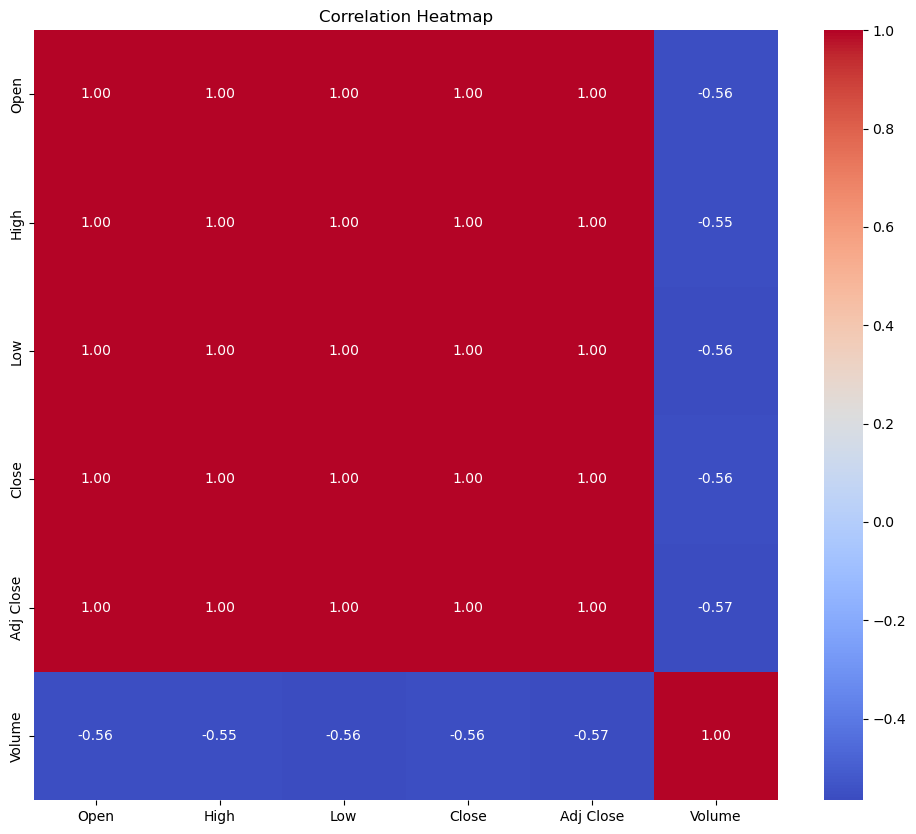

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Visualisation

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\168159897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Open)


<Axes: xlabel='Open', ylabel='Density'>

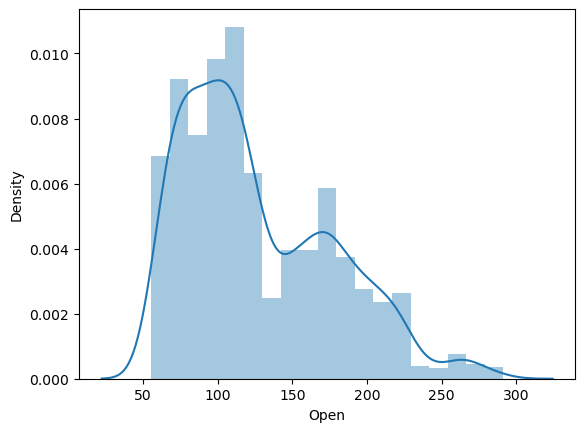

In [19]:
sns.distplot(df.Open)

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\3489652106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.High)


<Axes: xlabel='High', ylabel='Density'>

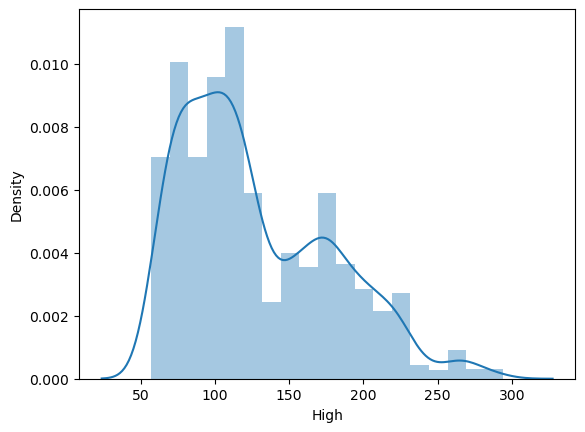

In [20]:
sns.distplot(df.High)

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\1904024971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Low)


<Axes: xlabel='Low', ylabel='Density'>

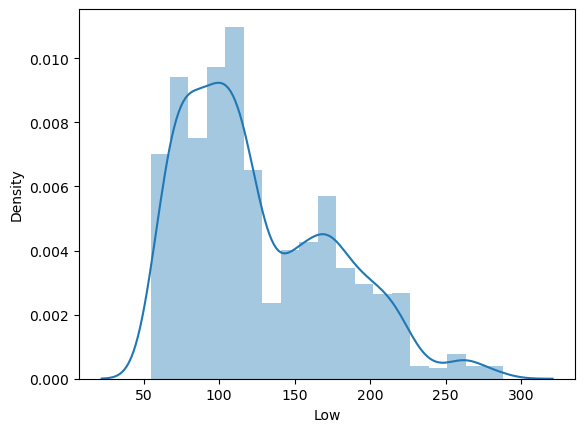

In [21]:
sns.distplot(df.Low)

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\1393048044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Close)


<Axes: xlabel='Close', ylabel='Density'>

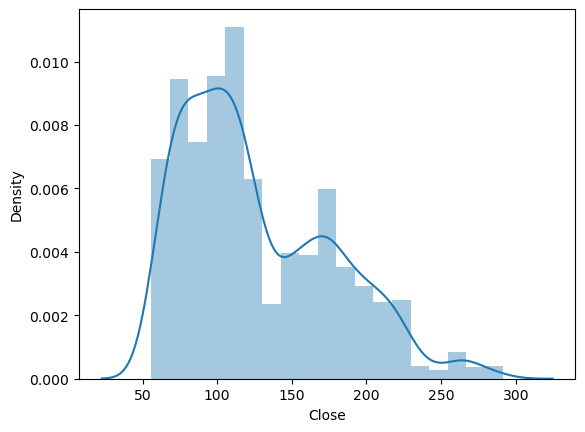

In [22]:
sns.distplot(df.Close)

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\2174584222.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Adj Close'])


<Axes: xlabel='Adj Close', ylabel='Density'>

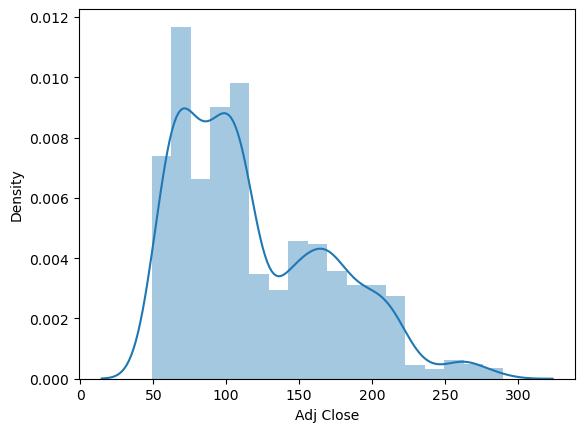

In [23]:
sns.distplot(df['Adj Close'])

C:\Users\vishal\AppData\Local\Temp\ipykernel_11632\3215733502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Volume)


<Axes: xlabel='Volume', ylabel='Density'>

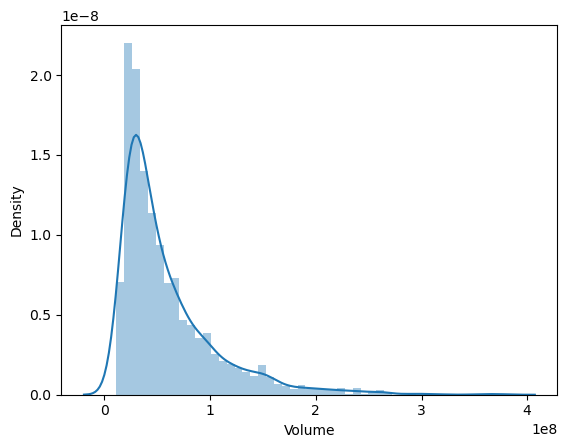

In [24]:
sns.distplot(df.Volume)

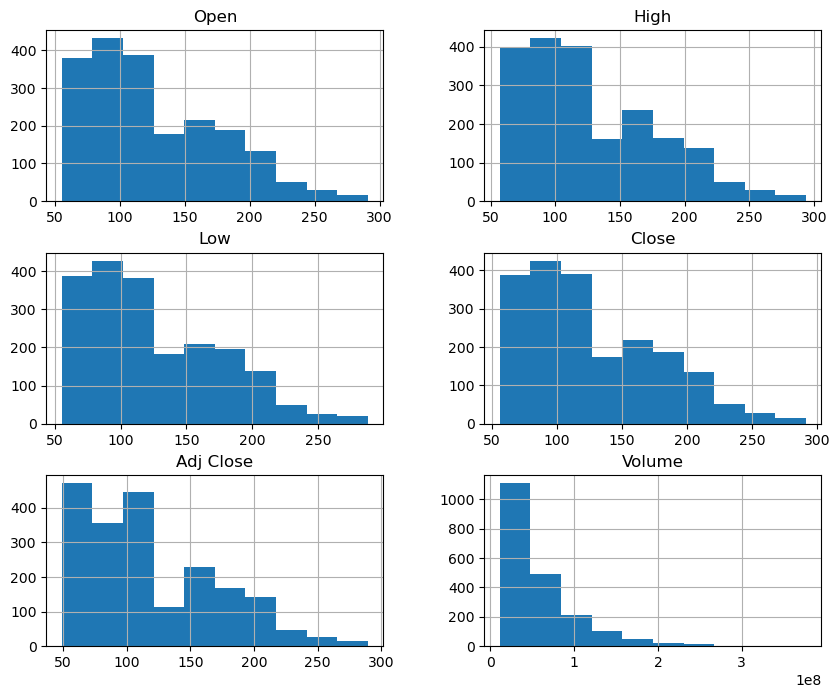

In [25]:
# Histograms for numerical variables
df.hist(bins=10, figsize=(10, 8))
plt.show()

C:\Users\vishal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


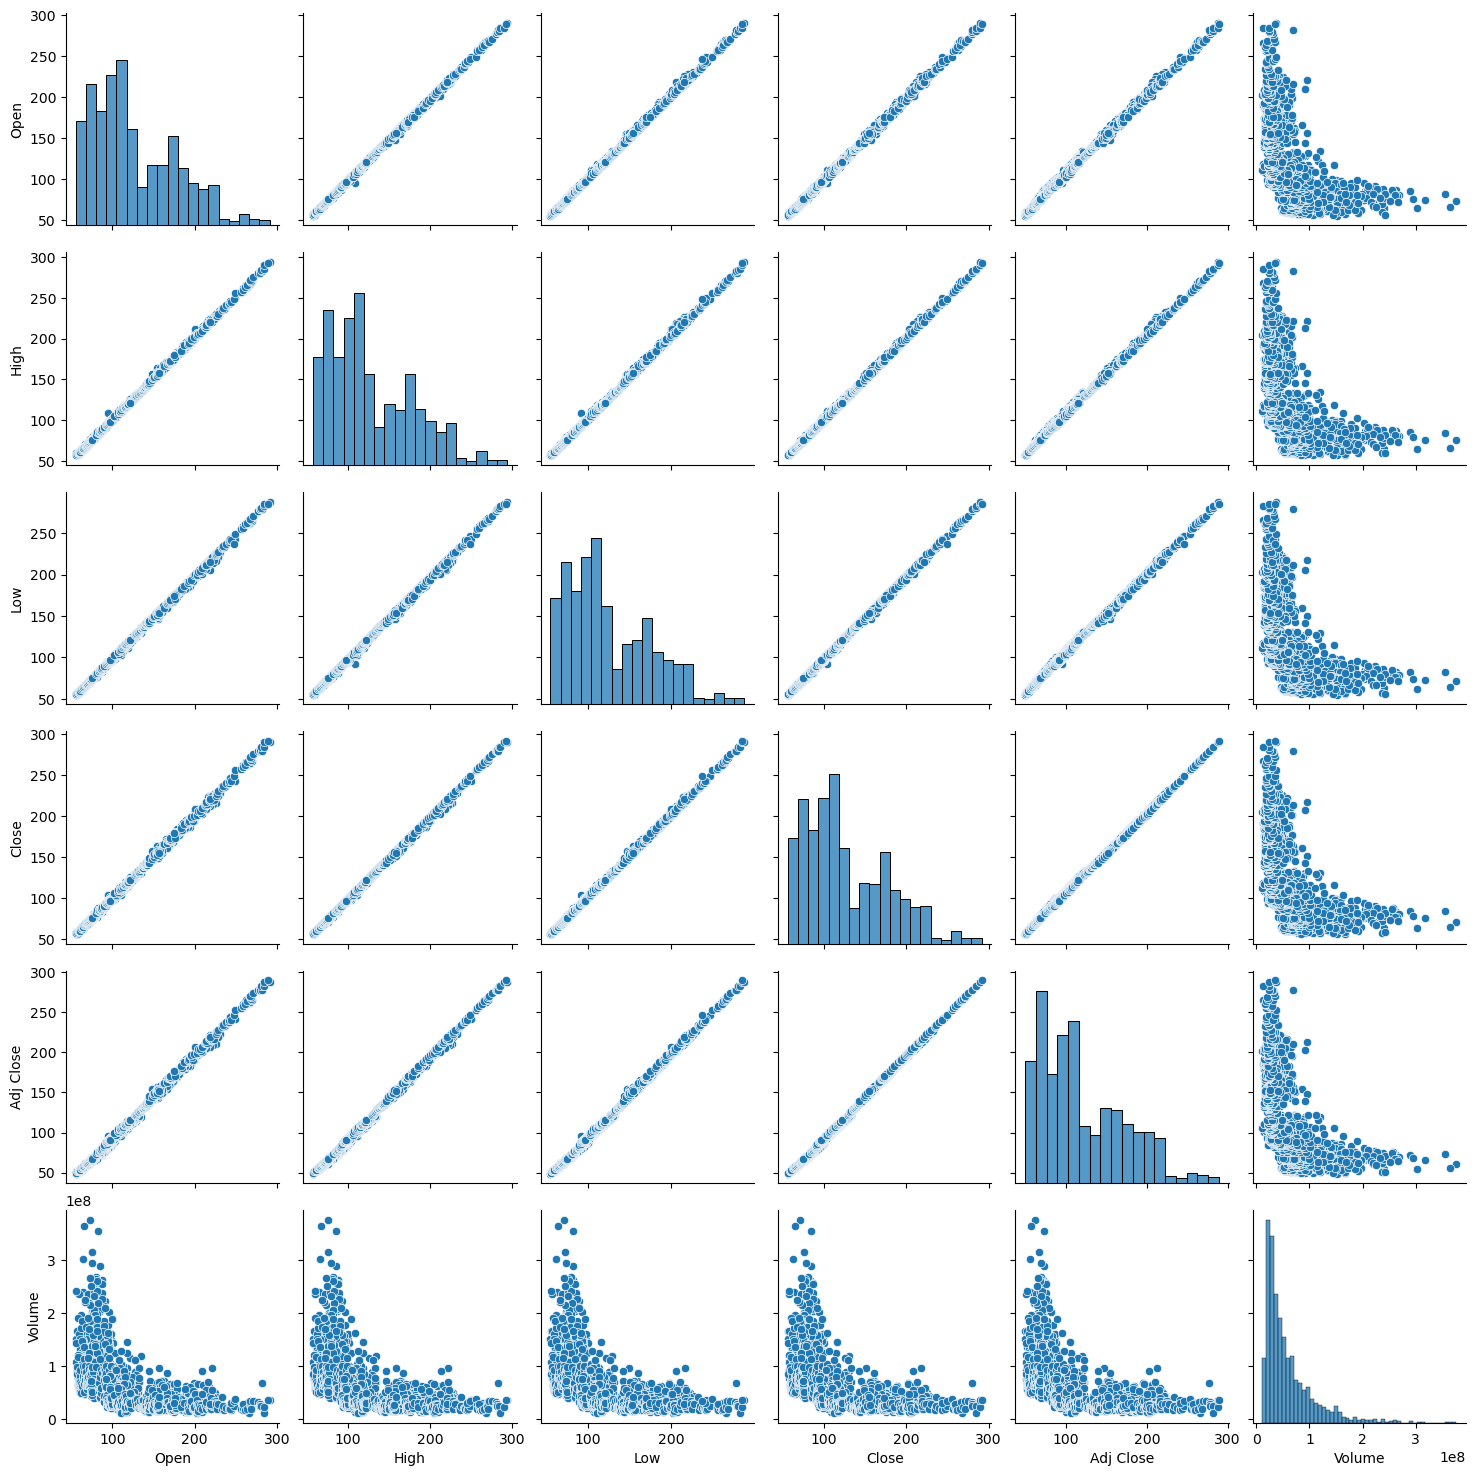

In [26]:
sns.pairplot(df)

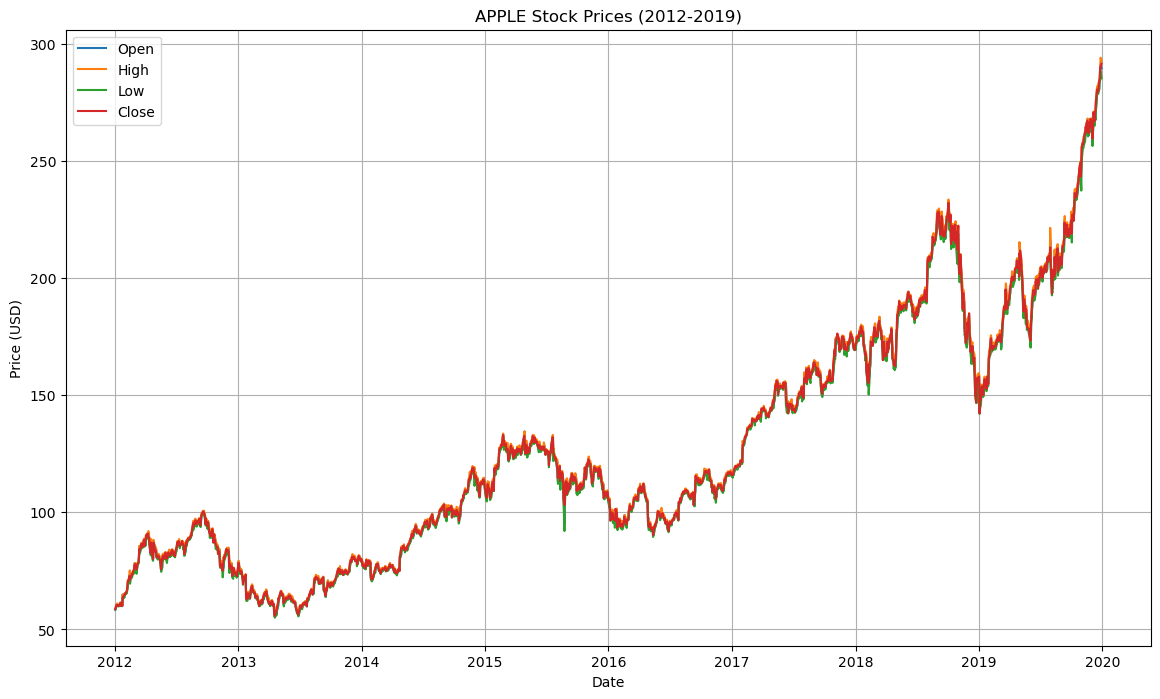

In [27]:
# Plotting the time series graphs for Open, High, Low, and Close prices
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.plot(df.index, df['Close'], label='Close')
plt.title('APPLE Stock Prices (2012-2019)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Summary statistics:
               Open         High          Low        Close
count  2011.000000  2011.000000  2011.000000  2011.000000
mean    126.707469   127.827594   125.580258   126.741235
std      50.483753    50.926301    50.124940    50.578369
min      55.424286    57.085712    55.014286    55.790001
25%      85.882858    86.717858    85.056427    86.202145
50%     113.050003   114.190002   111.870003   113.050003
75%     165.190002   167.409996   163.424995   165.245002
max     291.119995   293.970001   288.119995   291.519989


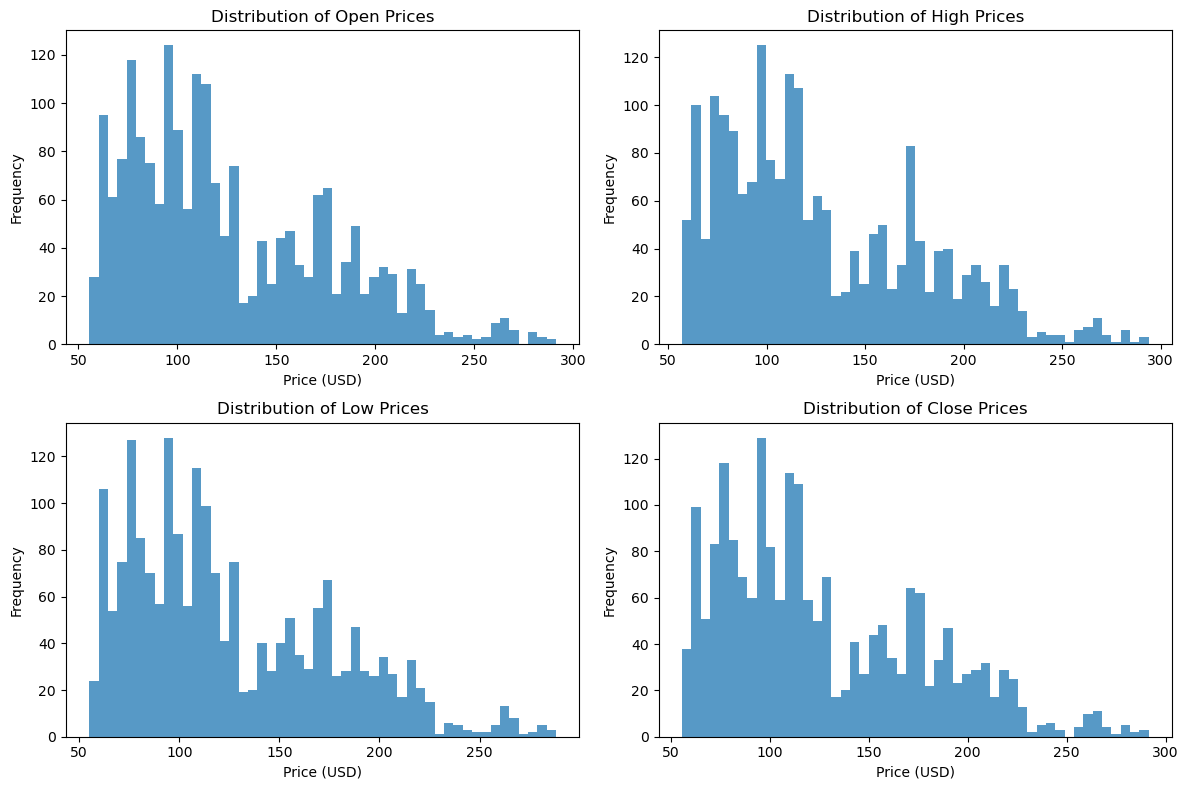

In [28]:
# Analyzing the distribution of prices
price_columns = ['Open', 'High', 'Low', 'Close']
summary_statistics = df[price_columns].describe()
print("Summary statistics:\n", summary_statistics)

# Plot histograms of the prices
plt.figure(figsize=(12, 8))
for i, col in enumerate(price_columns):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=50, alpha=0.75)
    plt.title(f'Distribution of {col} Prices')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [29]:
# Rolling Statistics
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

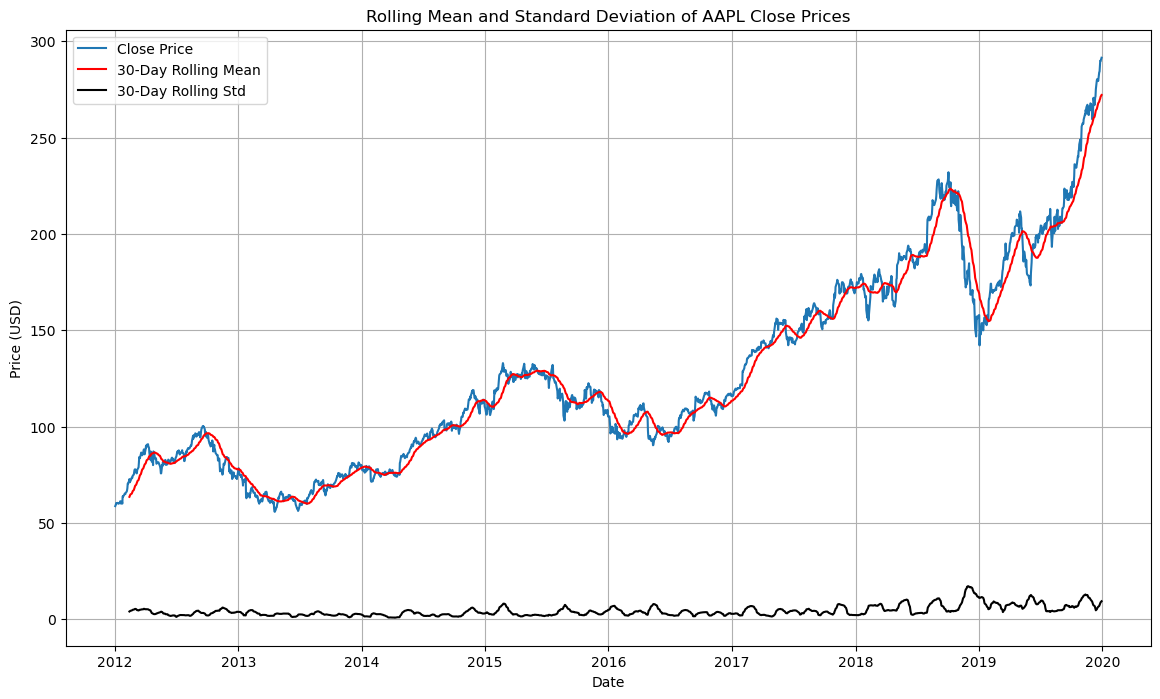

In [30]:

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, rolling_mean, label='30-Day Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='30-Day Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation of AAPL Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

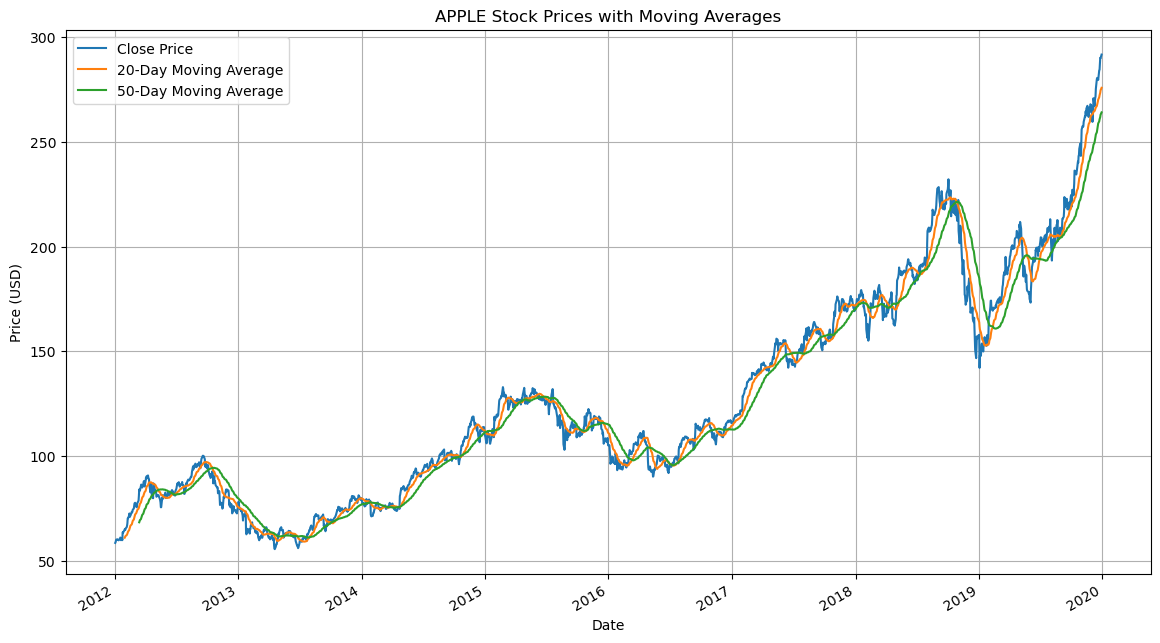

In [31]:
# Moving Averages
plt.figure(figsize=(14, 8))
df['Close'].plot(label='Close Price')
df['Close'].rolling(window=20).mean().plot(label='20-Day Moving Average')
df['Close'].rolling(window=50).mean().plot(label='50-Day Moving Average')
plt.title('APPLE Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


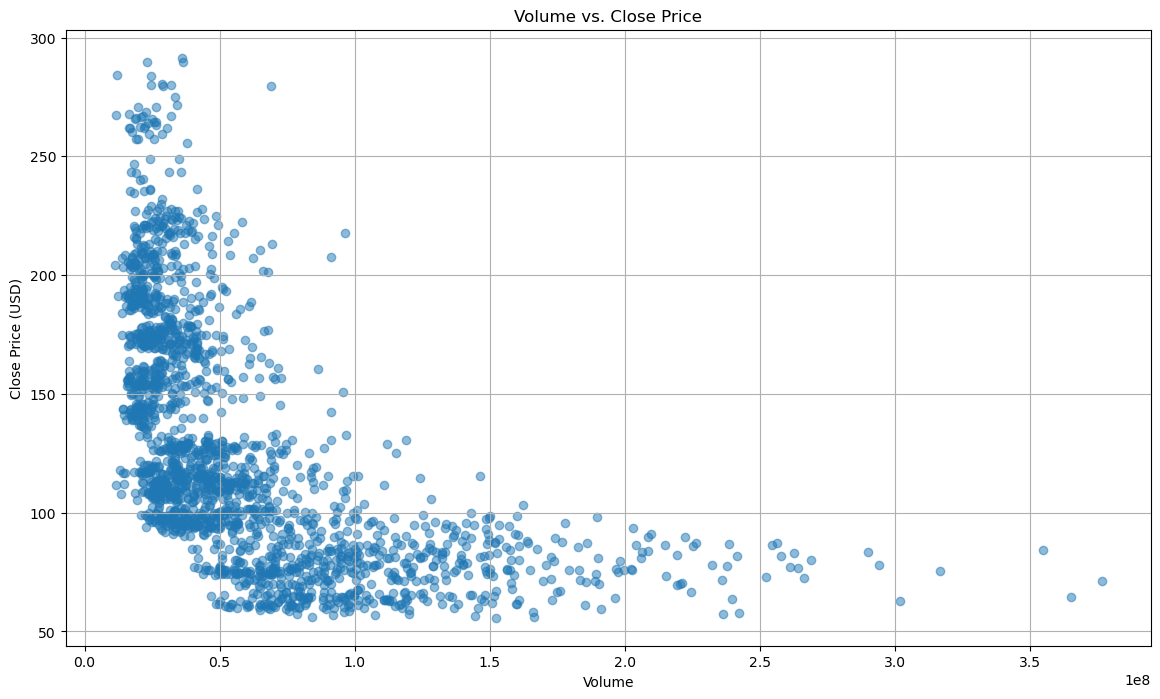

In [32]:
# Volume vs. Close Price
plt.figure(figsize=(14, 8))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

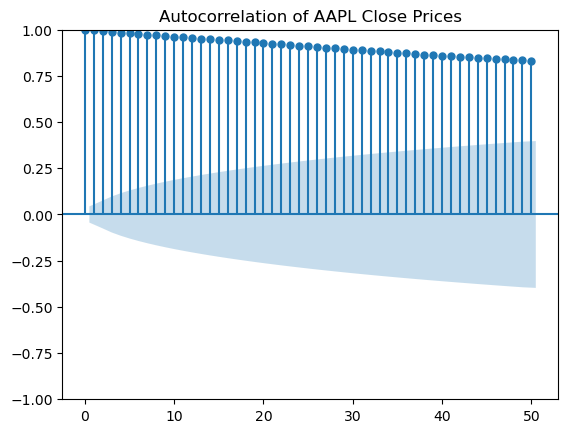

<Figure size 1400x800 with 0 Axes>

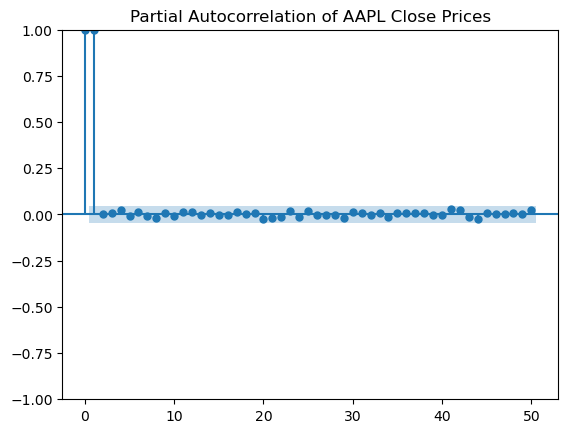

In [33]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 8))
plot_acf(df['Close'], lags=50)
plt.title('Autocorrelation of AAPL Close Prices')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(df['Close'], lags=50)
plt.title('Partial Autocorrelation of AAPL Close Prices')
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Open', 'High', 'Low', 'Volume']], df['Close'], test_size=0.2, random_state=42)

# Linear Regression Model

In [36]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')


Linear Regression Model:
MSE: 0.71
RMSE: 0.84
MAE: 0.53
MAPE: 0.43%
R2 Score: 1.00



# Support Vector Regression Model


In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 1.36
RMSE: 1.17
MAE: 0.84
MAPE: 0.69%
R2 Score: 1.00



# Random Forest Regression Model

In [38]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')


Random Forest Regression Model:
MSE: 1.02
RMSE: 1.01
MAE: 0.71
MAPE: 0.59%
R2 Score: 1.00



In [39]:
from keras.layers import Dropout

In [40]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

len_train_data

1911

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[0.01254462],
       [0.01388393],
       [0.01666555],
       ...,
       [0.99317022],
       [0.99270351],
       [1.        ]])

In [42]:
# Create the training data set 
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.01254462, 0.01388393, 0.01666555, 0.01931386, 0.01890783,
       0.01982291, 0.01940476, 0.01870177, 0.01774427, 0.02070771,
       0.02338026, 0.02255607, 0.01804122, 0.02235002, 0.01810788,
       0.03401591, 0.03278568, 0.03439165, 0.03786414, 0.03996702,
       0.03979128, 0.03914284, 0.04190629, 0.04450611, 0.04745139,
       0.05220865, 0.06220192, 0.06235342, 0.0679167 , 0.07207398,
       0.06492899, 0.06768034, 0.0676258 , 0.07534044, 0.07424353,
       0.07627369, 0.07992193, 0.08195212, 0.08780021, 0.09206054,
       0.09329074, 0.09372103, 0.08643668, 0.0846792 , 0.0849398 ,
       0.0917878 , 0.09371498, 0.09785407, 0.10761101, 0.12062833,
       0.11819212, 0.11819817, 0.12760968, 0.13055493, 0.12845809,
       0.12654309, 0.12454928, 0.13117306, 0.13571824, 0.13762114])]
[0.13291840917584063]

[array([0.01254462, 0.01388393, 0.01666555, 0.01931386, 0.01890783,
       0.01982291, 0.01940476, 0.01870177, 0.01774427, 0.02070771,
       0.02338026, 0.02255607, 0.01

(1851, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

Epoch 1/14
58/58 [==============================] - 100s 2s/step - loss: 0.0075
Epoch 2/14
58/58 [==============================] - 172s 3s/step - loss: 4.2271e-04
Epoch 3/14
58/58 [==============================] - 70s 1s/step - loss: 3.8482e-04
Epoch 4/14
58/58 [==============================] - 63s 1s/step - loss: 3.8002e-04
Epoch 5/14
58/58 [==============================] - 95s 2s/step - loss: 3.5471e-04
Epoch 6/14
58/58 [==============================] - 201s 3s/step - loss: 3.3262e-04
Epoch 7/14
58/58 [==============================] - 185s 3s/step - loss: 3.1142e-04
Epoch 8/14
58/58 [==============================] - 149s 3s/step - loss: 2.9283e-04
Epoch 9/14
58/58 [==============================] - 77s 1s/step - loss: 2.9439e-04
Epoch 10/14
58/58 [==============================] - 75s 1s/step - loss: 2.8101e-04
Epoch 11/14
58/58 [==============================] - 69s 1s/step - loss: 2.6223e-04
Epoch 12/14
58/58 [==============================] - 74s 1s/step - loss: 3.2137e-04


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = trained_scaled_data[len_train_data - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
# Baseline model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print('lstm Model:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}\n')


4/4 [==============================] - 7s 516ms/step
lstm Model:
MSE: 49.70
RMSE: 7.05
MAE: 6.02
MAPE: 2.46%
R2 Score: 0.93



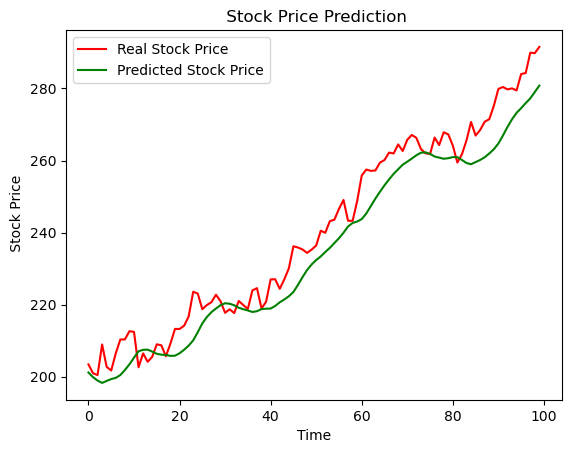

In [45]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [46]:
models = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regression', 'LSTM']
mse_scores = [ mse_lr, mse_svr, mse_rf, mse_lstm]
rmse_scores = [ rmse_lr, rmse_svr, rmse_rf, rmse_lstm]
mae_scores = [ mae_lr, mae_svr, mae_rf, mae_lstm]
mape_scores = [ mape_lr, mape_svr, mape_rf, mape_lstm]
r2_scores = [ r2_lr, r2_svr, r2_rf, r2_lstm]

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'RMSE': rmse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)

# Print the evaluation metrics
print(evaluation_df)

                                 MSE      RMSE       MAE      MAPE  R2 Score
Model                                                                       
Linear Regression           0.713478  0.844676  0.533150  0.427734  0.999717
Support Vector Regression   1.361792  1.166958  0.837066  0.689471  0.999460
Random Forest Regression    1.018972  1.009442  0.714926  0.586977  0.999596
LSTM                       49.700805  7.049880  6.022248  2.461275  0.928532


In [50]:
def forecast_next_30_days(df, test_data, model, scaler, mse_lstm, rmse_lstm, mae_lstm, mape_lstm, r2_lstm):
    # Forecast the next 30 days
    forecast_input = test_data[-60:]
    forecast_input = np.reshape(forecast_input, (1, forecast_input.shape[0], 1))
    
    forecast = []

    for _ in range(30):
        prediction = model.predict(forecast_input)
        forecast.append(prediction[0, 0])  # Append the scalar prediction value
        # Update forecast_input to include the new prediction
        forecast_input = np.append(forecast_input, prediction.reshape((1, 1, 1)), axis=1)
        # Remove the oldest prediction to maintain the window size
        forecast_input = forecast_input[:, 1:, :]

    # Inverse transform forecast to get actual values
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    forecast_dates = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=30)
    forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

    metrics = {
        'MSE': mse_lstm,
        'RMSE': rmse_lstm,
        'MAE': mae_lstm,
        'MAPE': mape_lstm,
        'R2 Score': r2_lstm
    }

    return metrics, forecast_df.to_dict()

# Example of how to use the function
metrics, forecast_dict = forecast_next_30_days(df, test_data, model, scaler, mse_lstm, rmse_lstm, mae_lstm, mape_lstm, r2_lstm)
print(metrics)
print(forecast_dict)


1/1 [==============================] - 0s 125ms/step
{'MSE': 49.700805025704106, 'RMSE': 7.049879788032141, 'MAE': 6.022247772568359, 'MAPE': 2.46127451480637, 'R2 Score': 0.9285321092953611}
{'Forecast': {Timestamp('2019-12-31 00:00:00', freq='D'): 282.59722900390625, Timestamp('2020-01-01 00:00:00', freq='D'): 283.0270080566406, Timestamp('2020-01-02 00:00:00', freq='D'): 282.7053527832031, Timestamp('2020-01-03 00:00:00', freq='D'): 281.8795471191406, Timestamp('2020-01-04 00:00:00', freq='D'): 280.7049865722656, Timestamp('2020-01-05 00:00:00', freq='D'): 279.2806701660156, Timestamp('2020-01-06 00:00:00', freq='D'): 277.67047119140625, Timestamp('2020-01-07 00:00:00', freq='D'): 275.9168701171875, Timestamp('2020-01-08 00:00:00', freq='D'): 274.04949951171875, Timestamp('2020-01-09 00:00:00', freq='D'): 272.0903625488281, Timestamp('2020-01-10 00:00:00', freq='D'): 270.05706787109375, Timestamp('2020-01-11 00:00:00', freq='D'): 267.9642333984375, Timestamp('2020-01-12 00:00:00', f

# Stock Price Forecast for the Next 30 Days

NameError: name 'forecast_dates' is not defined

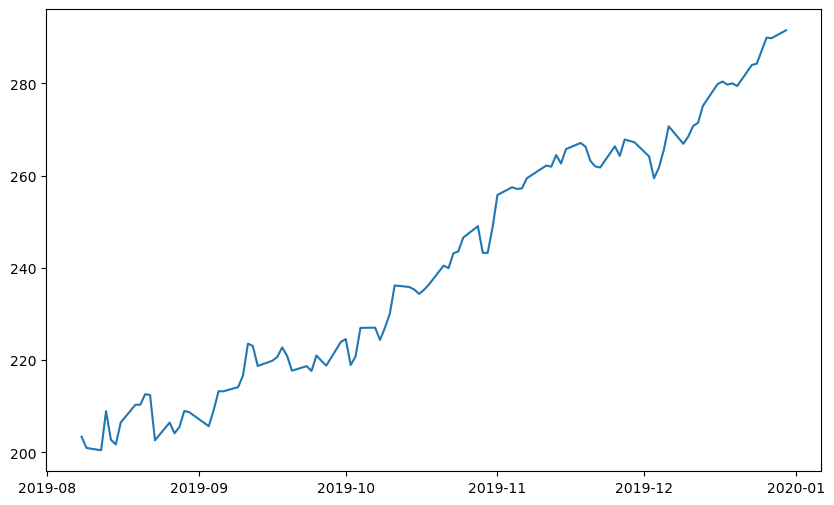

In [63]:
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index[-100:], df['Close'][-100:], label='Historical Data')
plt.plot(forecast_dates , forecast_df['Forecast'], label='Forecast')
plt.title('Stock Price Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

1/1 [==============================] - 0s 72ms/step
{'MSE': 49.700805025704106, 'RMSE': 7.049879788032141, 'MAE': 6.022247772568359, 'MAPE': 2.46127451480637, 'R2 Score': 0.9285321092953611}
{'Forecast': {Timestamp('2019-12-31 00:00:00', freq='D'): 282.59722900390625, Timestamp('2020-01-01 00:00:00', freq='D'): 283.0270080566406, Timestamp('2020-01-02 00:00:00', freq='D'): 282.7053527832031, Timestamp('2020-01-03 00:00:00', freq='D'): 281.8795471191406, Timestamp('2020-01-04 00:00:00', freq='D'): 280.7049865722656, Timestamp('2020-01-05 00:00:00', freq='D'): 279.2806701660156, Timestamp('2020-01-06 00:00:00', freq='D'): 277.67047119140625, Timestamp('2020-01-07 00:00:00', freq='D'): 275.9168701171875, Timestamp('2020-01-08 00:00:00', freq='D'): 274.04949951171875, Timestamp('2020-01-09 00:00:00', freq='D'): 272.0903625488281, Timestamp('2020-01-10 00:00:00', freq='D'): 270.05706787109375, Timestamp('2020-01-11 00:00:00', freq='D'): 267.9642333984375, Timestamp('2020-01-12 00:00:00', fr

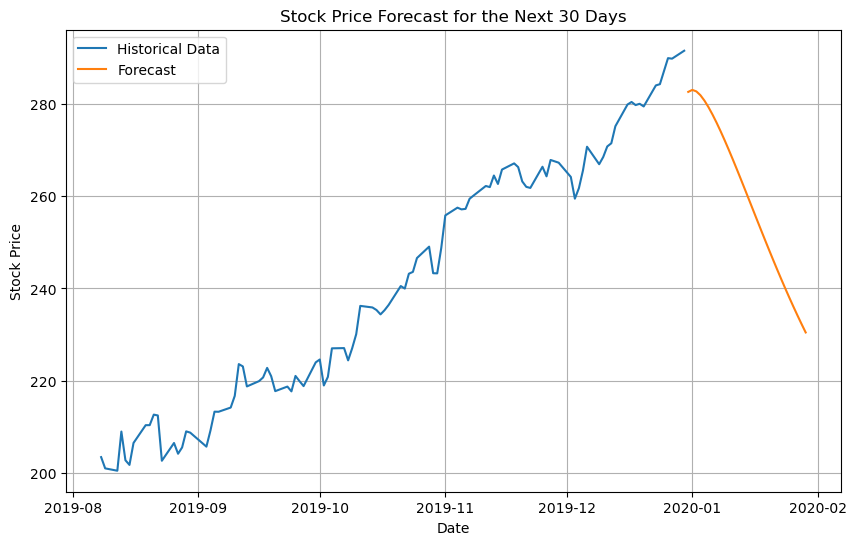

In [62]:
import matplotlib.pyplot as plt

def forecast_next_30_days(df, test_data, model, scaler, mse_lstm, rmse_lstm, mae_lstm, mape_lstm, r2_lstm):
    # Forecast the next 30 days
    forecast_input = test_data[-60:]
    forecast_input = np.reshape(forecast_input, (1, forecast_input.shape[0], 1))
    
    forecast = []

    for _ in range(30):
        prediction = model.predict(forecast_input)
        forecast.append(prediction[0, 0])  # Append the scalar prediction value
        # Update forecast_input to include the new prediction
        forecast_input = np.append(forecast_input, prediction.reshape((1, 1, 1)), axis=1)
        # Remove the oldest prediction to maintain the window size
        forecast_input = forecast_input[:, 1:, :]

    # Inverse transform forecast to get actual values
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
    forecast_dates = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=30)
    forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-100:], df['Close'][-100:], label='Historical Data')
    plt.plot(forecast_dates, forecast_df['Forecast'], label='Forecast')
    plt.title('Stock Price Forecast for the Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)

    # Saving the plot as a URL
#     import io
#     import urllib
#     buffer = io.BytesIO()
#     plt.savefig(buffer, format='png')
#     buffer.seek(0)
#     plot_url = urllib.parse.quote(base64.b64encode(buffer.getvalue()).decode())

#     plt.close()

    # Metrics
    metrics = {
        'MSE': mse_lstm,
        'RMSE': rmse_lstm,
        'MAE': mae_lstm,
        'MAPE': mape_lstm,
        'R2 Score': r2_lstm
    }

    return metrics,  forecast_df.to_dict()

# Example of how to use the function
metrics, forecast_dict = forecast_next_30_days(df, test_data, model, scaler, mse_lstm, rmse_lstm, mae_lstm, mape_lstm, r2_lstm)
print(metrics)
# print(plot_url)
print(forecast_dict)
